# 1 - Introduction to Data Mining

### Data Mining (TEL-354), Ingeniería Civil Telemática, UTFSM.
### Prof. Mauricio Araya

## 1.1 - Reactive vs Learning Agent

<b>NOTE</b>: We will use the `numpy` package for vector-based computations

### 1.1.1 - A very simple machine that learns a pattern

* A <b>reactive agent</b> is a program that reacts to a predefined set of rules (patterns), for example:

In [1]:
import numpy as np

def reactive_agent(x):
    if x > 10.0:
        return True
    else:
        return False
    
vreact = np.vectorize(reactive_agent)

In [2]:
a = 3
b = a
print(b)

3


* Given some data, it applies the rules:



In [3]:
import numpy as np
X = np.array([10.9, 5.34, 8.32, 12.43, 20.32, 7.24])
y = vreact(X)
print(y)

[ True False False  True  True False]


* A <b>learning agent</b>, learns from data (in this case labels) to infer the pattern.

In [4]:
def learning_agent(x,Data,labels):
    v_true  = np.mean(Data[labels==True])
    v_false = np.mean(Data[labels==False])
    d_true  = np.abs(x - v_true)
    d_false  = np.abs(x - v_false)
    if d_true < d_false:
        return True
    else:
        return False
    

Let us define a random vector of data to test

In [5]:
scale = 20
Xtest = np.random.rand(4)*scale
vlearn = np.vectorize(lambda x: learning_agent(x,X,y))
print(Xtest)
print(vlearn(Xtest))

[ 8.79301403 11.52917523  0.3454071  19.23813854]
[False  True False  True]


Which pattern is the learning machine using?

In [6]:
def get_pattern():
    v_true  = np.mean(X[y==True])
    v_false = np.mean(X[y==False])
    return (v_true + v_false)/2

get_pattern()

10.758333333333333

### 1.1.2 - How the pattern evolve with the data size?

* Let us now change `X` and `y` for a random vector and the output of the ractive agent respectively.

In [7]:
def generate_data(n):
    X = np.random.rand(n)*scale
    y = vreact(X)
    return(X,y)

* And see how the pattern behave...

In [8]:
X,y = generate_data(100)
get_pattern()

9.856805314997303

* Now, we will repeat that for several values of `n` many times. We will record the mean and the standard deviation for every `n` value.

In [9]:
reps = 100
nvals =np.arange(10,1000,10)
pmean = []
pvar = []
for n in nvals:
    pm = 0
    pv = 0
    for i in range(reps):
        X,y = generate_data(int(n))
        val = get_pattern()
        pm += val 
        pv += val*val
    pm=pm/np.float(reps)
    pv=np.sqrt(pv/np.float(reps)- pm*pm)
    pmean.append(pm)   
    pvar.append(pv)
pmean=np.array(pmean)
pvar=np.array(pvar)

* And plot the mean and variance using the `matplotlib` library.

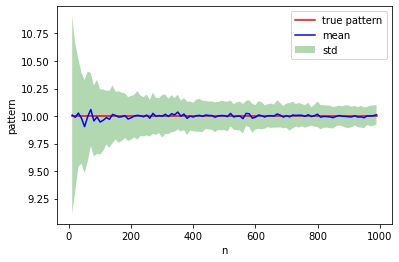

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(nvals,np.ones(len(nvals))*10,color='red',label='true pattern')
plt.plot(nvals,pmean,color='blue',label='mean')
plt.fill_between(nvals, pmean + pvar, pmean-pvar, facecolor='green', alpha=0.3,label="std")
plt.legend()
plt.ylabel("pattern")
plt.xlabel("n")
plt.show()

### 1.1.3 - what about wrong labels?
* Labels are not always reliable. 
* To simulate this, let us fix `n = 1000` and randomly modify labels.

In [11]:
reps = 200
n = 1000
jvals =np.arange(1,1000,5)
pmean = []
pvar = []
for j in jvals: 
    pm = 0
    pv = 0
    for i in range(reps):
        X,y = generate_data(int(n))
        inds = np.random.choice(y.size, size=j,replace=False)
        y[inds]=np.invert(y[inds])
        val = get_pattern()
        pm += val 
        pv += val*val
    pm=pm/np.float(reps)
    pv=np.sqrt(pv/np.float(reps)- pm*pm)
    pmean.append(pm)   
    pvar.append(pv)
pmean=np.array(pmean)
pvar=np.array(pvar)

* And plot the mean and variance w.r.t. the number of random changes

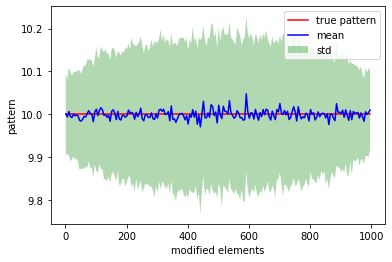

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(jvals,np.ones(len(jvals))*10,color='red',label='true pattern')
plt.plot(jvals,pmean,color='blue',label='mean')
plt.fill_between(jvals, pmean + pvar, pmean-pvar, facecolor='green', alpha=0.3,label="std")
plt.legend()
plt.ylabel("pattern")
plt.xlabel("modified elements")
plt.show()

## 1.2 - Exploratory Analysis in 6 Questions About Data

We will explore the FIFA 2019 data (you can find it in Kaggle). 

Here is the textbook data science process.

![Data Science](Data-Science-Process.png)

However, in practice one goes back and forward to achieve an exploratory data analysis.

### 1.2.1 -What is the data made of?

* FIFA data comes in a `.csv` format
* We will use pandas package as our data manager, and it can read CSVs!

In [13]:
import pandas

* We can read a comma separated values file as a pandas dataframe (i.e. a Table object).

In [14]:
table = pandas.read_csv("data.csv")
table

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,4,26,86,72,28,59,94,86,4,Medium/ Medium
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,5,23,91,88,31,79,82,87,4,High/ Low
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,5,33,90,81,24,49,87,84,5,High/ Medium
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,1,13,58,43,21,64,68,13,3,Medium/ Medium
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,4,51,76,90,58,75,94,82,5,High/ High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13720,13720,235656,W. Al Anazi,23,https://cdn.sofifa.org/players/4/19/235656.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,62,69,Al Shabab,...,2,56,66,77,57,60,60,37,3,High/ Medium
13721,13721,208009,W. Jobello,24,https://cdn.sofifa.org/players/4/19/208009.png,France,https://cdn.sofifa.org/flags/18.png,62,67,GFC Ajaccio,...,2,19,70,60,17,57,55,64,3,Medium/ Medium
13722,13722,209546,Rafhael Lucas,25,https://cdn.sofifa.org/players/4/19/209546.png,Brazil,https://cdn.sofifa.org/flags/54.png,62,67,Jaguares de Córdoba,...,2,43,83,54,45,56,53,59,3,Medium/ Medium
13723,13723,226186,Luo Xin,28,https://cdn.sofifa.org/players/4/19/226186.png,China PR,https://cdn.sofifa.org/flags/155.png,62,63,Beijing Renhe FC,...,2,61,63,68,64,66,60,44,2,Low/ High


* To explore this data, first we need to check the column names and be sure abouth the semantics.

In [15]:
table.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Body Type', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'Composure',
       'Contract Valid Until', 'Crossing', 'Curve', 'Dribbling', 'FKAccuracy',
       'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Loaned From',
       'LongPassing', 'LongShots', 'Marking', 'Penalties', 'Position',
       'Positioning', 'Preferred Foot', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'Reactions', 'Real Face', 'Release Clause',
       'ST', 'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', '

In [16]:
selected = ['Name','Age','Nationality','Overall','Potential','Value']
table[selected]

,Name,Age,Nationality,Overall,Potential,Value
0,L. Messi,31,Argentina,94,94,€110.5M
1,Cristiano Ronaldo,33,Portugal,94,94,€77M
2,Neymar Jr,26,Brazil,92,93,€118.5M
3,De Gea,27,Spain,91,93,€72M
4,K. De Bruyne,27,Belgium,91,92,€102M
...,...,...,...,...,...,...
13720,W. Al Anazi,23,Saudi Arabia,62,69,€425K
13721,W. Jobello,24,France,62,67,€400K
13722,Rafhael Lucas,25,Brazil,62,67,€400K
13723,Luo Xin,28,China PR,62,63,€280K


In [17]:
from IPython.core.display import display, HTML
# HTML hack to see images
img_lst = []
for purl in table['Photo']:
    img_lst.append('<img src="'+ str(purl) + '"/>')
table['Picture']=img_lst
img_lst = []
for purl in table['Flag']:
    img_lst.append('<img src="'+ purl + '"/>')
table['Country']=img_lst
img_lst = []
for purl in table['Club Logo']:
    img_lst.append('<img src="'+ purl + '"/>')
table['FCLogo']=img_lst
pandas.set_option('display.max_colwidth', -1)
t100 = table[1:100]
HTML(t100[['Picture','Name','Age','Nationality','Country','Club','FCLogo','Overall','Potential','Value']].to_html(escape=False))


<ipython-input-17-cf4df66d64e4>:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pandas.set_option('display.max_colwidth', -1)


,Picture,Name,Age,Nationality,Country,Club,FCLogo,Overall,Potential,Value
1,,Cristiano Ronaldo,33,Portugal,,Juventus,,94,94,€77M
2,,Neymar Jr,26,Brazil,,Paris Saint-Germain,,92,93,€118.5M
3,,De Gea,27,Spain,,Manchester United,,91,93,€72M
4,,K. De Bruyne,27,Belgium,,Manchester City,,91,92,€102M
5,,E. Hazard,27,Belgium,,Chelsea,,91,91,€93M
6,,L. Modrić,32,Croatia,,Real Madrid,,91,91,€67M
7,,L. Suárez,31,Uruguay,,FC Barcelona,,91,91,€80M
8,,Sergio Ramos,32,Spain,,Real Madrid,,91,91,€51M
9,,J. Oblak,25,Slovenia,,Atlético Madrid,,90,93,€68M
10,,T. Courtois,26,Belgium,,Real Madrid,,90,91,€62M


<AxesSubplot:xlabel='Overall', ylabel='Potential'>

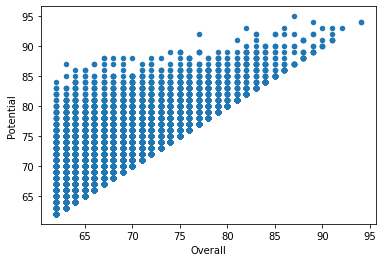

In [18]:
table.plot.scatter('Overall','Potential')

Text(0.5, 1.0, 'All')

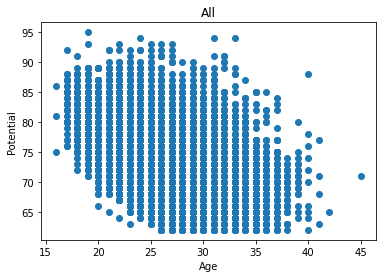

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.scatter(table.Age,table.Potential)
plt.xlabel("Age")
plt.ylabel("Potential")
plt.title("All")

### 1.2.2 - What we need to fix of the Data?
* Usually, not all fields are used for every sample, and some values are in human-readable form (not numerical, i.e., String).
* Let us fix the currency values first

In [20]:
# Convert currency to floats
table['Unit'] = table['Value'].str[-1]
table['ValueNum'] = np.where(table['Unit'] == '0', 0, 
                                    table['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
table['ValueNum'] = table['ValueNum'].astype(float)
table['ValueNum'] = np.where(table['Unit'] == 'M', 
                                    table['ValueNum'], 
                                    table['ValueNum']/1000)

table['Unit2'] = table['Wage'].str[-1]
table['WageNum'] = np.where(table['Unit2'] == '0', 0, 
                                    table['Wage'].str[1:-1].replace(r'[a-zA-Z]',''))
table['WageNum'] = table['WageNum'].astype(float)
table['WageNum'] = np.where(table['Unit2'] == 'M', 
                                    table['WageNum'], 
                                    table['WageNum']/1000)
table[['Value','ValueNum','Wage','WageNum']]



,Value,ValueNum,Wage,WageNum
0,€110.5M,110.500,€565K,0.565
1,€77M,77.000,€405K,0.405
2,€118.5M,118.500,€290K,0.290
3,€72M,72.000,€260K,0.260
4,€102M,102.000,€355K,0.355
...,...,...,...,...
13720,€425K,0.425,€5K,0.005
13721,€400K,0.400,€1K,0.001
13722,€400K,0.400,€1K,0.001
13723,€280K,0.280,€2K,0.002


* That allowed us reach more data!

Text(0, 0.5, 'Price')

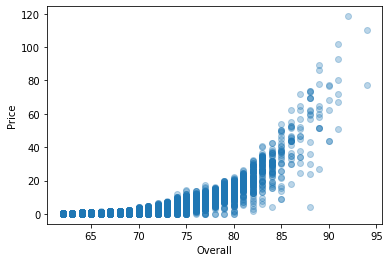

In [21]:
plt.figure()
plt.scatter(table['Overall'],table['ValueNum'],alpha=0.3)
plt.xlabel("Overall")
plt.ylabel("Price")

### 1.2.3 - How to we organize the data?

In [22]:
grouped = table.groupby('Nationality')

In [23]:
table.groupby('Nationality')['Overall','Potential'].mean()

<ipython-input-23-ca4b9dd7ee30>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  table.groupby('Nationality')['Overall','Potential'].mean()


,Overall,Potential
Nationality,,
Afghanistan,63.000000,64.000000
Albania,68.500000,72.750000
Algeria,71.150000,73.300000
Angola,69.916667,72.250000
Antigua & Barbuda,66.500000,71.000000
...,...,...
Uzbekistan,75.000000,75.000000
Venezuela,69.145455,74.418182
Wales,67.759036,71.361446


In [24]:
select = grouped.size().sort_values(ascending=False)
top15  = select[:15]

In [25]:
top15

Nationality
England          996
Spain            964
Germany          902
Brazil           823
Argentina        801
France           744
Italy            602
Colombia         472
Netherlands      375
Portugal         315
United States    281
Chile            278
Japan            277
Sweden           252
Mexico           252
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

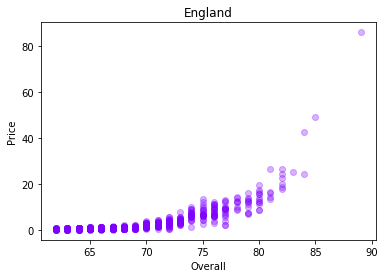

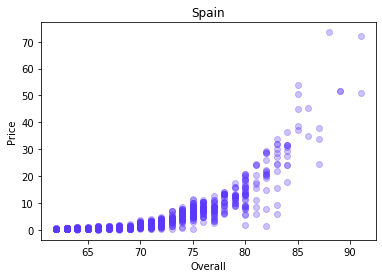

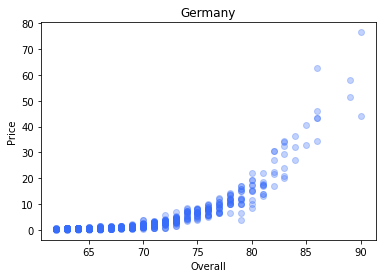

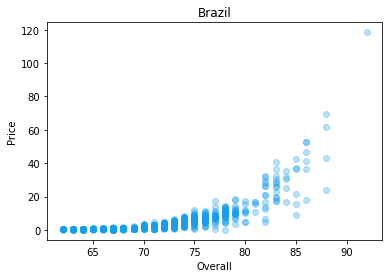

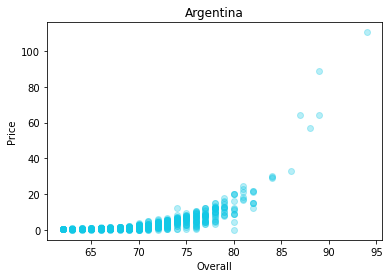

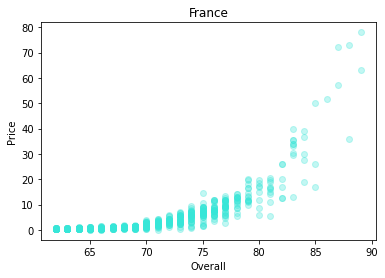

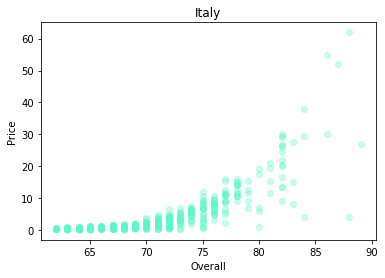

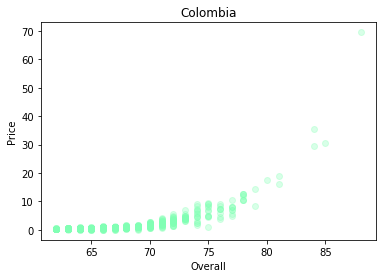

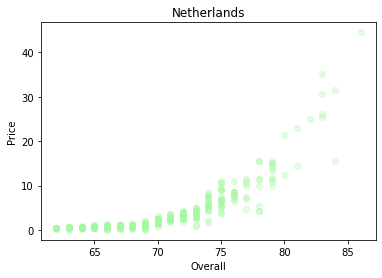

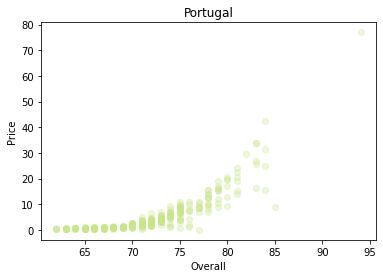

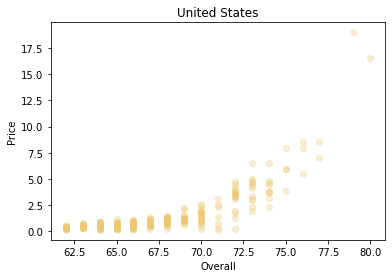

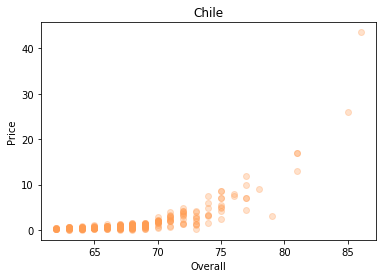

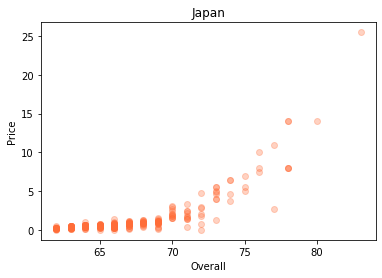

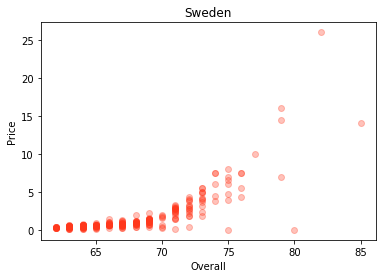

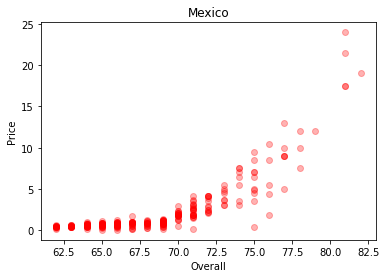

In [26]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
color=plt.cm.rainbow(np.linspace(0,1,top15.size))

i=0
for country in top15.keys():
    plt.figure()
    elms=grouped.groups[country]
    plt.scatter(table['Overall'][elms],table['ValueNum'][elms],c=color[i],alpha=0.3)
    plt.title(country)
    plt.xlabel("Overall")
    plt.ylabel("Price")
    i+=1

### 1.2.4 - How do we clean/select the data?

In [27]:
fulltab=table.dropna(axis=1)
print(str(len(table.columns) - len(fulltab.columns)) + " columns removed for incompleteness")

34 columns removed for incompleteness


In [28]:
fulltab.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Body Type', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'FKAccuracy', 'Finishing', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'Jumping', 'LongPassing', 'LongShots', 'Marking', 'Penalties',
       'Positioning', 'Preferred Foot', 'Reactions', 'Real Face',
       'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
       'Volleys', 'Weak Foot', 'Work Rate', 'Picture', 'Country', 'FCLogo',
       'Unit', 'ValueNum', 'Unit2', 'WageNum'],
      dtype='object')

In [29]:
num_feat = ['Age', 'Overall', 'Potential', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Composure', 'Crossing', 'Curve', 'Dribbling',
       'FKAccuracy', 'Finishing', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'Jumping', 'LongPassing', 'LongShots', 'Marking', 'Penalties',
       'Positioning', 'Reactions',
       'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
       'Volleys', 'ValueNum', 'WageNum']
santab=fulltab[num_feat].astype(float)
santab

,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,...,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,ValueNum,WageNum
0,31.0,94.0,94.0,2195.0,91.0,48.0,91.0,95.0,96.0,96.0,...,4.0,26.0,86.0,72.0,28.0,59.0,94.0,86.0,110.500,0.565
1,33.0,94.0,94.0,2228.0,89.0,63.0,87.0,70.0,94.0,95.0,...,5.0,23.0,91.0,88.0,31.0,79.0,82.0,87.0,77.000,0.405
2,26.0,92.0,93.0,2143.0,94.0,56.0,96.0,84.0,95.0,94.0,...,5.0,33.0,90.0,81.0,24.0,49.0,87.0,84.0,118.500,0.290
3,27.0,91.0,93.0,1471.0,57.0,38.0,60.0,43.0,42.0,68.0,...,1.0,13.0,58.0,43.0,21.0,64.0,68.0,13.0,72.000,0.260
4,27.0,91.0,92.0,2281.0,78.0,76.0,79.0,77.0,91.0,88.0,...,4.0,51.0,76.0,90.0,58.0,75.0,94.0,82.0,102.000,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13720,23.0,62.0,69.0,1677.0,60.0,65.0,74.0,72.0,60.0,53.0,...,2.0,56.0,66.0,77.0,57.0,60.0,60.0,37.0,0.425,0.005
13721,24.0,62.0,67.0,1557.0,72.0,39.0,64.0,62.0,61.0,51.0,...,2.0,19.0,70.0,60.0,17.0,57.0,55.0,64.0,0.400,0.001
13722,25.0,62.0,67.0,1696.0,78.0,33.0,66.0,76.0,66.0,44.0,...,2.0,43.0,83.0,54.0,45.0,56.0,53.0,59.0,0.400,0.001
13723,28.0,62.0,63.0,1602.0,57.0,63.0,71.0,64.0,57.0,55.0,...,2.0,61.0,63.0,68.0,64.0,66.0,60.0,44.0,0.280,0.002


### 1.2.5 - Does the content of our data make sense?

In [ ]:
import seaborn as sns
def plot_corr_matrix(data,features=None,annot=True,s=(16,10)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()
    
plot_corr_matrix(santab,annot=False)

In [ ]:
feat_select = ['Age','Overall',
       'Potential', 'Special','ValueNum','WageNum']
plot_corr_matrix(santab,features=feat_select)
sns.pairplot(santab,diag_kind="kde",vars=feat_select)

In [ ]:
sns.pairplot?

### 1.2.6 -Can we simplify things?

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(santab)
stdtab = pandas.DataFrame(scaler.transform(santab))
n = len(stdtab.columns)
sklearn_pca = PCA(n_components=n,random_state=1)
xpca = sklearn_pca.fit_transform(stdtab)
varx=sklearn_pca.explained_variance_ratio_
plt.plot(np.arange(1,n+1),varx.cumsum())
plt.ylabel("% of variance")
plt.xlabel("components")

In [ ]:
components = sklearn_pca.components_
ind=[]
for i in range(components.shape[0]):
    ind.append("PC"+str(i+1))
feature_weights= pandas.DataFrame(np.abs(components),columns=santab.columns,index=ind)
fig= plt.figure(figsize=(16,10))
ax= fig.add_subplot(111)
ax = sns.heatmap(feature_weights,cmap="seismic",vmin=0,vmax=1)

In [ ]:
n = 5
sklearn_pca = PCA(n_components=n,random_state=1)
ind=[]
for i in range(n):
    ind.append("PC"+str(i+1))
xpca = sklearn_pca.fit_transform(stdtab)
varx=sklearn_pca.explained_variance_ratio_
plt.plot(np.arange(1,n+1),varx.cumsum())
plt.ylabel("% of variance")
plt.xlabel("components")

In [ ]:
transtab = pandas.DataFrame(xpca,columns=ind)
sns.pairplot(transtab,diag_kind="kde")

### 1.2.7 -Can we automatize the pattern recognition?

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from ipywidgets import interact
rad = 5.0
db = DBSCAN(rad,min_samples=50).fit(xpca)  
transtab['cluster']=db.labels_
sns.pairplot(transtab,vars=ind, hue="cluster")

In [ ]:
tclust2 = table[transtab['cluster']==1]
HTML(tclust2[['Unnamed: 0','Picture','Name','Age','Country','FCLogo']].to_html(escape=False))

In [ ]:
tclust1 = xpca[transtab['cluster']==0]
torig1 = table[transtab['cluster']==0].copy()
km = KMeans(5).fit(tclust1) 
newtab = pandas.DataFrame(tclust1,columns=ind)
newtab['cluster']=km.labels_
sns.pairplot(newtab,vars=ind, hue="cluster")